In [30]:
import numpy as np
import pandas as pd

In [31]:
df=pd.read_csv("netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [32]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [33]:
from sklearn.impute import SimpleImputer

si=SimpleImputer(strategy="most_frequent")

df[["director"]] =  si.fit_transform(df[["director"]])

df[["cast"]] = si.fit_transform(df[["cast"]])

df[["country"]] =  si.fit_transform(df[["country"]])

df[["date_added"]] = si.fit_transform(df[["date_added"]])

df[["rating"]] = si.fit_transform(df[["rating"]])

df[["duration"]] = si.fit_transform(df[["duration"]])


In [34]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [35]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [36]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in df.select_dtypes(include=["object"]).columns.to_list():

    df[i]= le.fit_transform(df[i])


In [37]:
X = df.drop(["type"],axis=1)
y= df["type"]


In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train= scaler.fit_transform(X_train)

X_test= scaler.transform(X_test)


In [40]:
from sklearn.tree import DecisionTreeClassifier

tr=DecisionTreeClassifier()

tr.fit(X_train,y_train)

y_pred=tr.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 1, 0], shape=(1762,))

In [41]:
y_test

8399    0
3147    0
3537    0
5958    0
4508    1
       ..
1149    1
6019    0
3422    0
4857    1
1315    0
Name: type, Length: 1762, dtype: int64

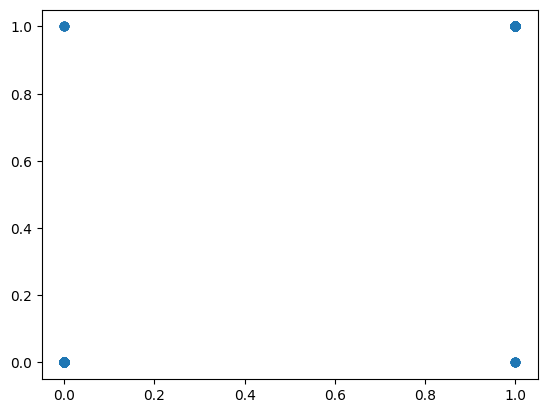

In [42]:
from matplotlib import pyplot

pyplot.scatter(y_test,y_pred)